Start importing libraries

In [1]:
import scipy
from scipy.spatial import distance
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm # colormap

Define the exponentiated quadratic Kernel, K = exp(-0.5(x-x')^2), which normalizes to 1

In [15]:
def exponentiated_quadratic(xa, xb):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

Sample from the Gaussian process distribution. Let's start with small number of input points and only one realization (draw from the distribution)

In [18]:
nb_of_samples = 3  # Number of points in each function
number_of_functions = 1  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
K = exponentiated_quadratic(X, X)  # Kernel of data points
print(X)
print(K)

[[-4.]
 [ 0.]
 [ 4.]]
[[1.00000000e+00 3.35462628e-04 1.26641655e-14]
 [3.35462628e-04 1.00000000e+00 3.35462628e-04]
 [1.26641655e-14 3.35462628e-04 1.00000000e+00]]


Draw samples from the prior at the input points.
Assume a mean of 0 for this prior. The posterior will work with this prior and compute a non-zero mean.

In [19]:
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=K,
    size=number_of_functions)
print(ys)


[[ 1.25456916 -0.02970056  0.42384879]]


Plot the sampled functions (one realization)

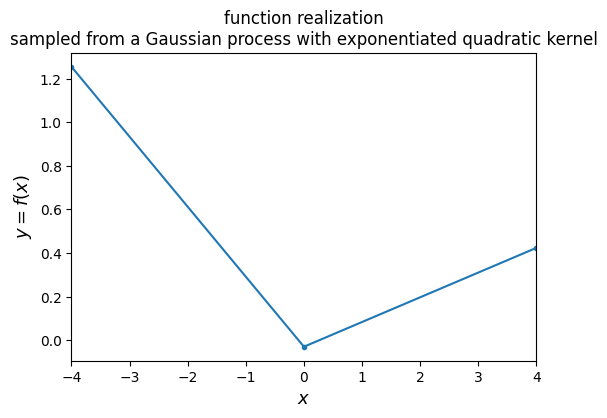

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(X, ys[0], linestyle='-', marker='o', markersize=3)

# label the plot
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    'function realization\n'
    'sampled from a Gaussian process with exponentiated quadratic kernel'))
plt.xlim([-4, 4])
plt.show()

The result above shows various realization of 3-dimensional Gaussians. We can see that y is more correlated (similar) for closer input points.

We can go back and increase the number of input points and the number of realizations of this Gaussian process prior

Let's expand to many dimensions, say 40

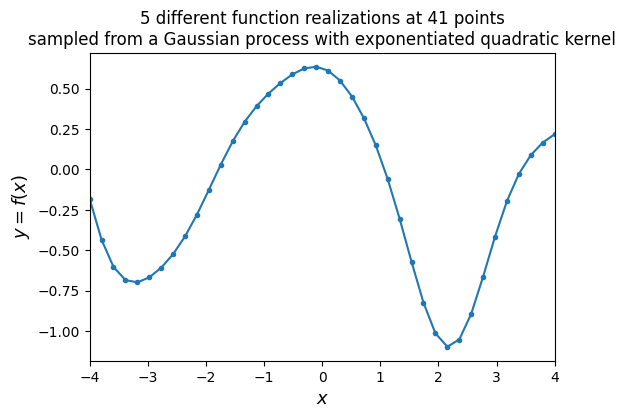

[[1.00000000e+00 9.79180981e-01 9.19288607e-01 ... 3.10031069e-13
  6.39923308e-14 1.26641655e-14]
 [9.79180981e-01 1.00000000e+00 9.79180981e-01 ... 1.44015238e-12
  3.10031069e-13 6.39923308e-14]
 [9.19288607e-01 9.79180981e-01 1.00000000e+00 ... 6.41412786e-12
  1.44015238e-12 3.10031069e-13]
 ...
 [3.10031069e-13 1.44015238e-12 6.41412786e-12 ... 1.00000000e+00
  9.79180981e-01 9.19288607e-01]
 [6.39923308e-14 3.10031069e-13 1.44015238e-12 ... 9.79180981e-01
  1.00000000e+00 9.79180981e-01]
 [1.26641655e-14 6.39923308e-14 3.10031069e-13 ... 9.19288607e-01
  9.79180981e-01 1.00000000e+00]]


In [21]:
nb_of_samples = 40  # Number of points in each function
number_of_functions = 1  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
S = exponentiated_quadratic(X, X)  # Kernel of data points

ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=S,
    size=number_of_functions)

plt.figure(figsize=(6, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    '5 different function realizations at 41 points\n'
    'sampled from a Gaussian process with exponentiated quadratic kernel'))
plt.xlim([-4, 4])
plt.show()
print(S)

And number of realizations

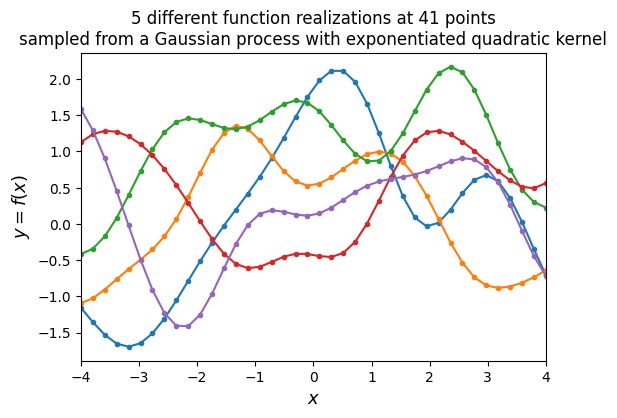

In [8]:
nb_of_samples = 40  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
S = exponentiated_quadratic(X, X)  # Kernel of data points

ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=S,
    size=number_of_functions)

plt.figure(figsize=(6, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    '5 different function realizations at 41 points\n'
    'sampled from a Gaussian process with exponentiated quadratic kernel'))
plt.xlim([-4, 4])
plt.show()

We can once again verify that y(x1) is less correlated (similar) to y(x2) if x1 is further appart from x2

To make this more obvious, we can plot the joint distribution of various x1, x2 pairs and notice that they are less correlated as their distance is further appart. E.g. K(0,0.2)= 0.98 whereas K(0,2) = 0.14. Let's see this on the joint density function

[[1.         0.98019867]
 [0.98019867 1.        ]]
[[1.         0.13533528]
 [0.13533528 1.        ]]


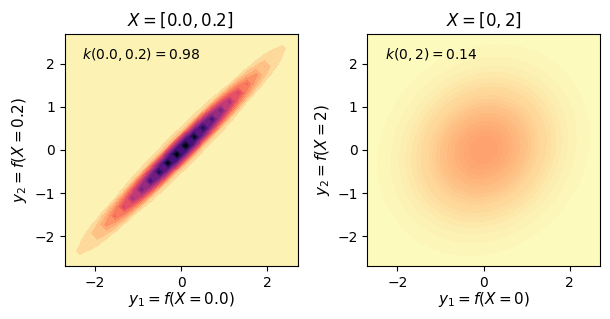

In [9]:
# Show marginal 2D Gaussians

import matplotlib.gridspec as gridspec
from scipy import stats

def generate_surface(mean, covariance, surface_resolution):
    """Helper function to generate density surface."""
    x1s = np.linspace(-5, 5, num=surface_resolution) # array of evenly distributed input samples
    x2s = np.linspace(-5, 5, num=surface_resolution) # array of evenly distributed input samples
    x1, x2 = np.meshgrid(x1s, x2s) # Generate a grid for ploting
    pdf = np.zeros((surface_resolution, surface_resolution)) # init array of zeros to compute probability density function

    # Fill the cost matrix for each combination of weights
    for i in range(surface_resolution):
        for j in range(surface_resolution):
            pdf[i,j] = stats.multivariate_normal.pdf( # compute joint pdf for x1 and x2 arrays
                np.array([x1[i,j], x2[i,j]]),
                mean=mean, cov=covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

surface_resolution = 50  # Resolution of the surface to plot
fig = plt.figure(figsize=(6.2, 3.5))
gs = gridspec.GridSpec(1, 2)
ax_p1 = plt.subplot(gs[0,0]) # horizontal axis
ax_p2 = plt.subplot(gs[0,1], sharex=ax_p1, sharey=ax_p1) # vertical axis

# Compute strong correlation
X_strong = np.array([[0], [0.2]]) # just two points x1 = 0, and x2 = 0.2. They should be quite correlated since they are close
mu = np.array([0., 0.])
S_strong = exponentiated_quadratic(X_strong, X_strong)
y1, y2, p = generate_surface(mu, S_strong, surface_resolution=surface_resolution)
print(S_strong)

# Plot bivariate distribution
con1 = ax_p1.contourf(y1, y2, p, 25, cmap=cm.magma_r) # this function can plot 25 contour lines of the joint distribution of x1 and x2

ax_p1.set_xlabel( # this is just to make things look pretty
    f'$y_1 = f(X={X_strong[0,0]})$',
    fontsize=11, labelpad=0)
ax_p1.set_ylabel(
    f'$y_2 = f(X={X_strong[1,0]})$',
    fontsize=11)
ax_p1.axis([-2.7, 2.7, -2.7, 2.7])
ax_p1.set_aspect('equal')
ax_p1.text(
    -2.3, 2.1,
    (f'$k({X_strong[0,0]}, {X_strong[1,0]}) '
     f'= {S_strong[0,1]:.2f}$'),
    fontsize=10)
ax_p1.set_title(
    f'$X = [{X_strong[0,0]}, {X_strong[1,0]}]$ ',
    fontsize=12)

# Compute weak correlation
X_weak = np.array([[0], [2]]) # now the two input points are far appart so correlation is small
mu = np.array([0., 0.])
S_weak = exponentiated_quadratic(X_weak, X_weak)
print(S_weak)
y1, y2, p = generate_surface(mu, S_weak, surface_resolution=surface_resolution)

# Plot bivariate distribution
con2 = ax_p2.contourf(y1, y2, p, 25, cmap=cm.magma_r) # plotting contour for 2nd joint distribution
con2.set_cmap(con1.get_cmap())
con2.set_clim(con1.get_clim())

ax_p2.set_xlabel( # making things look pretty
    f'$y_1 = f(X={X_weak[0,0]})$',
    fontsize=11, labelpad=0)
ax_p2.set_ylabel(
    f'$y_2 = f(X={X_weak[1,0]})$',
    fontsize=11)
ax_p2.set_aspect('equal')
ax_p2.text(
    -2.3, 2.1,
    (f'$k({X_weak[0,0]}, {X_weak[1,0]}) '
     f'= {S_weak[0,1]:.2f}$'),
    fontsize=10)
ax_p2.set_title(
    f'$X = [{X_weak[0,0]}, {X_weak[1,0]}]$',
    fontsize=12)

plt.tight_layout()
plt.show()




So far, we don't have any prior on the measurements for $y = f(x)$. But we will use GP's Kernel as a prior to create a posterior distribution given some measurements $y = f(x)$. This posterior can then be used as an approximation of the desired process.

Problem formulation: We want to make predictions $y_2 = f(X_2)$, where $X_2$ is a point or an array, given known measurments $y_1 = f(X_1)$. We will formulate this problem as $p(y_2|y_1,X_1,X_2)$.

The joint distribution is also Gaussian:
$[x_1;x_2] \sim \mathcal{N}([\mu_1;\mu_2], [\Sigma_{11}, \Sigma_{12}; \Sigma_{21}, \Sigma_{22}]$

Recall conditional distribution from book: Machine Learning, a Probabilistic Perspective, Kevin Murphy, 2012, Section 4.3

http://noiselab.ucsd.edu/ECE228/Murphy_Machine_Learning.pdf

$p(y_2|y_1,X_1,X_2) = N(\mu_{2|1},\Sigma_{2|1})$

$\mu_{2|1} = \mu_2 + \Sigma_{2|1} \Sigma_{11}^{-1} (y_1-\mu_1)$

we assume mean prior is zero $\mu_1 = 0$

$\Sigma_{2|1} = \Sigma_{22} - \Sigma_{2|1} \Sigma_{11}^{-1} \Sigma_{12}$

Notice that the mean of the posterior $y_{2|1}$ is weighted by the covariance function K.

In [11]:
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1),
    and the prior kernel function.
    """
    # Kernel of the observations
    S11 = kernel_func(X1, X1) # in our case the Kernel will be the exponential quadratic Kernel
    # Kernel of observations vs to-predict
    S12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(S11, S12, assume_a='pos').T # this solves for {\Sigma_11)^{-1} \Sigma_12 which appers both in the posterior's mean and covariance
    # Compute posterior mean
    mu2 = solved @ y1
    # Compute the posterior covariance
    S22 = kernel_func(X2, X2)
    S2 = S22 - (solved @ S12)
    return mu2, S2  # mean, covariance

We will now use the above function to approximate a process. We will compute the posterior mean and covariance for example process, f(x) = sin(x)


x2 [[-6.        ]
 [-5.83783784]
 [-5.67567568]
 [-5.51351351]
 [-5.35135135]
 [-5.18918919]
 [-5.02702703]
 [-4.86486486]
 [-4.7027027 ]
 [-4.54054054]
 [-4.37837838]
 [-4.21621622]
 [-4.05405405]
 [-3.89189189]
 [-3.72972973]
 [-3.56756757]
 [-3.40540541]
 [-3.24324324]
 [-3.08108108]
 [-2.91891892]
 [-2.75675676]
 [-2.59459459]
 [-2.43243243]
 [-2.27027027]
 [-2.10810811]
 [-1.94594595]
 [-1.78378378]
 [-1.62162162]
 [-1.45945946]
 [-1.2972973 ]
 [-1.13513514]
 [-0.97297297]
 [-0.81081081]
 [-0.64864865]
 [-0.48648649]
 [-0.32432432]
 [-0.16216216]
 [ 0.        ]
 [ 0.16216216]
 [ 0.32432432]
 [ 0.48648649]
 [ 0.64864865]
 [ 0.81081081]
 [ 0.97297297]
 [ 1.13513514]
 [ 1.2972973 ]
 [ 1.45945946]
 [ 1.62162162]
 [ 1.78378378]
 [ 1.94594595]
 [ 2.10810811]
 [ 2.27027027]
 [ 2.43243243]
 [ 2.59459459]
 [ 2.75675676]
 [ 2.91891892]
 [ 3.08108108]
 [ 3.24324324]
 [ 3.40540541]
 [ 3.56756757]
 [ 3.72972973]
 [ 3.89189189]
 [ 4.05405405]
 [ 4.21621622]
 [ 4.37837838]
 [ 4.54054054]
 [ 4.70

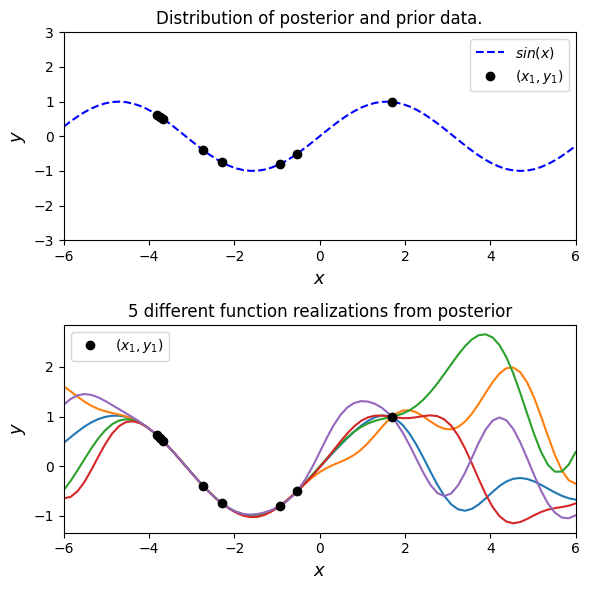

In [45]:
# Define the true function that we want to regress on
f_sin = lambda x: (np.sin(x)).flatten() # A python lambda function can take any number of arguments (input points in this case), but can only have one expression.
# Flatten returns a flat list.

n1 = 8  # Number of points to condition on (training points). These are the points where we have measurements y = f(x)
n2 = 75  # Number of points in posterior (test points). These are the points where we want to predict without having measurements
ny = 5  # Number of functions that will be sampled from the posterior. These are the various realizations of the GP posterior.
domain = (-6, 6) # This is the input domain

# Sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1)) # we sample randomly 8 samples between X = (-4, 4)
y1 = f_sin(X1)

# Predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1) # here we use 75 points in the domain X = (-6,6) to predict process

# Compute posterior mean and covariance
mu2, S2 = GP(X1, y1, X2, exponentiated_quadratic) # here is where the posterior is calcuate
# print('x2',X2)

print(len(mu2))
print(mu2)
# Compute the standard deviation at the test points to be plotted
ss2 = np.sqrt(np.diag(S2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mu2, cov=S2, size=ny) # we draw ny realizations of the posterior Gaussian Process

# plot posterior distribution
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

# Let's first plot the process and the mean of the 5 realizatons

# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_sin(X2), 'b--', label='$sin(x)$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()

# Plot some samples from this function
ax2.plot(X2, y2.T, '-')
ax2.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('5 different function realizations from posterior')
ax2.set_xlim([-6, 6])
ax2.legend()

plt.tight_layout()
plt.show()

Let's superimposed the prediction and the actual process plus the confidence bounds equal to $\pm 2\,\sigma_2$. We employ the function from matplotlib: fill_between()

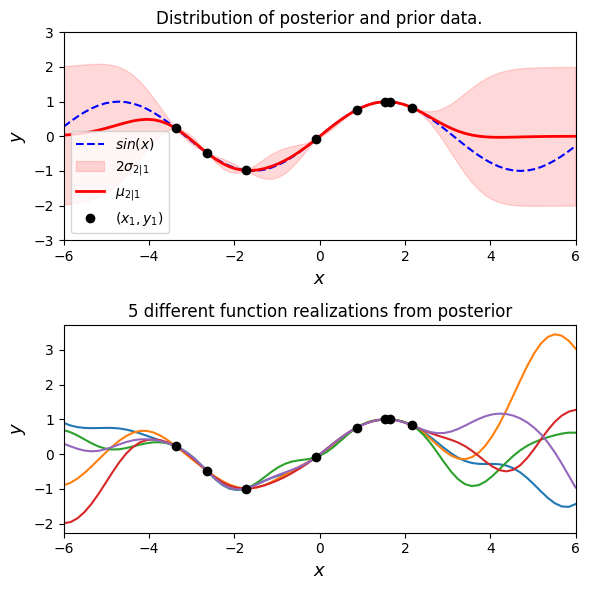

In [50]:
# Define the true function that we want to regress on
f_sin = lambda x: (np.sin(x)).flatten() # A python lambda function can take any number of arguments (input points in this case), but can only have one expression. Flatten returns a flat list.

n1 = 8  # Number of points to condition on (training points). These are the points where we have measurements y = f(x)
n2 = 75  # Number of points in posterior (test points). These are the points where we want to predict without having measurements
ny = 5  # Number of functions that will be sampled from the posterior. These are the various realizations of the GP posterior.
domain = (-6, 6) # This is the input process

# Sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1)) # we sample randomly 8 samples between X = (-4, 4)
y1 = f_sin(X1)
# Predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1) # here we use 75 points in the domain X = (-6,6) to predict process
# Compute posterior mean and covariance
mu2, S2 = GP(X1, y1, X2, exponentiated_quadratic)
# Compute the standard deviation at the test points to be plotted
ss2 = np.sqrt(np.diag(S2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mu2, cov=S2, size=ny) # we draw ny realizations of the posterior Gaussian Process

# plot posterior distribution
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_sin(X2), 'b--', label='$sin(x)$')
ax1.fill_between(X2.flat, mu2-2*ss2, mu2+2*ss2, color='red',
                 alpha=0.15, label='$2 \sigma_{2|1}$') # here we are filling the subplot 1 (referenced with ax1 axes pointer) with color between mu2±sigma2
ax1.plot(X2, mu2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()

# Plot some samples from this function
ax2.plot(X2, y2.T, '-')
ax2.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('5 different function realizations from posterior')
ax1.axis([domain[0], domain[1], -3, 3])
ax2.set_xlim([-6, 6])
plt.tight_layout()
plt.show()

We can try new functions, e.g. f(x) = x sin(x)

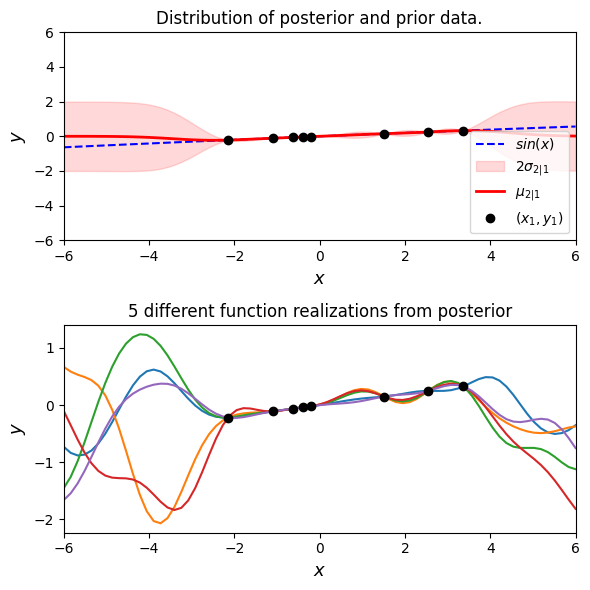

In [23]:
# Define the true function that we want to regress on
# f_sin = lambda x: (x*np.sin(x)).flatten() # A python lambda function can take any number of arguments (input points in this case), but can only have one expression. Flatten returns a flat list.
# Parameters
r = 0.1  # Intrinsic growth rate
K = 100  # Carrying capacity
initial_population = 10  # Initial population size
f_sin = lambda x: (r * x * (1 - x / K)).flatten() # A python lambda function can take any number of arguments (input points in this case), but can only have one expression. Flatten returns a flat list.

n1 = 8  # Number of points to condition on (training points). These are the points where we have measurements y = f(x)
n2 = 75  # Number of points in posterior (test points). These are the points where we want to predict without having measurements
ny = 5  # Number of functions that will be sampled from the posterior. These are the various realizations of the GP posterior.
domain = (-6, 6) # This is the input process

# Sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1))
y1 = f_sin(X1)
# Predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)
# Compute posterior mean and covariance
mu2, S2 = GP(X1, y1, X2, exponentiated_quadratic)
# Compute the standard deviation at the test points to be plotted
ss2 = np.sqrt(np.diag(S2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mu2, cov=S2, size=ny)

# plot posterior distribution
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_sin(X2), 'b--', label='$sin(x)$')
ax1.fill_between(X2.flat, mu2-2*ss2, mu2+2*ss2, color='red',
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(X2, mu2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()

# Plot some samples from this function
ax2.plot(X2, y2.T, '-')
ax2.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('5 different function realizations from posterior')
ax1.axis([domain[0], domain[1], -6, 6]) # extend the vertical range
ax2.set_xlim([-6, 6])
plt.tight_layout()
plt.show()